 EXPLORATORY DATA ANAYLSIS PROJECT 1 

QUESTION 1(a)
onvert all the ‘?’ values to NaN. Clean the data as per further requirement. (2 Marks)

In [97]:
import pandas as pd
import numpy as np
df = pd.read_csv('automobile_data.csv')
df.replace('?', np.nan, inplace=True)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


QUESTION :1(b)
Which company manufactured the most expensive car and at what price? (3 Marks)

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

most_expen = df.loc[df['price'].idxmax()]
company = most_expen['make']
price = most_expen['price']

print(f"Company: {company}, Price: ${price}")



Company: mercedes-benz, Price: $45400.0


1(c)  Calculate the maximum horsepower for each company. (3 Marks)

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
max_hp = df.groupby('make')['horsepower'].max()
print(max_hp)


make
alfa-romero      154.0
audi             160.0
bmw              182.0
chevrolet         70.0
dodge            145.0
honda            101.0
isuzu             90.0
jaguar           262.0
mazda            135.0
mercedes-benz    184.0
mercury          175.0
mitsubishi       145.0
nissan           200.0
peugot           142.0
plymouth         145.0
porsche          288.0
renault            NaN
saab             160.0
subaru           111.0
toyota           161.0
volkswagen       110.0
volvo            162.0
Name: horsepower, dtype: float64


1(D) What is the total count of cars manufactured by each company? (3 Marks)

In [ ]:
car_count = df['make'].value_counts()
print(car_count)


make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64


1(e) Based on new regulations, companies decided to change the prices of the car. The 
new update price is calculated as - if the engine is in front, price will be same else if 
the engine is in rear, price will be doubled. Add a new column with the updated prices(4 marks)

In [98]:
df['engine-location']
df['updated-price'] = df['price'] 
df.loc[df['engine-location'] == 'rear', 'updated-price'] = df['price'] * 2
df[df['engine-location'] == 'rear']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,updated-price
126,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,mpfi,3.74,2.9,9.5,207,5900,17,25,32528,3252832528
127,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,mpfi,3.74,2.9,9.5,207,5900,17,25,34028,3402834028
128,3,NaN,porsche,gas,std,two,convertible,rwd,rear,89.5,...,mpfi,3.74,2.9,9.5,207,5900,17,25,37028,3702837028


1(f)  Sort the dataframe according to car and price combined. (2 Marks)

In [ ]:
df.sort_values(by=['make', 'price'], inplace=True)
df[['make', 'price']].head()

,make,price
0,alfa-romero,13495
1,alfa-romero,16500
2,alfa-romero,16500
3,audi,13950
5,audi,15250


  1(g) Create a new column which stores the number of doors in a car as integers. (2 Marks)

In [ ]:
door_mapping = {'two': 2, 'four': 4}
df['num-of-doors-int'] = df['num-of-doors'].map(door_mapping)
df[['make', 'num-of-doors', 'num-of-doors-int']].head()

,make,num-of-doors,num-of-doors-int
0,alfa-romero,two,2.0
1,alfa-romero,two,2.0
2,alfa-romero,two,2.0
3,audi,four,4.0
5,audi,two,2.0


1(h)  Calculate which variable/feature/attribute is impacting the price of the car the most.
(2 Marks)

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
correlations = df.dropna(subset=['price']).corr(numeric_only=True)['price'].sort_values(ascending=False)
print("Features most impacting price:\n", correlations)


Features most impacting price:
 price                1.000000
engine-size          0.872335
curb-weight          0.834415
width                0.751265
length               0.690628
wheel-base           0.584642
height               0.135486
compression-ratio    0.071107
num-of-doors-int     0.046532
symboling           -0.082391
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64


1(i)  oncatenate the two data frames given below firstly row wise and secondly column 
wise. (3 Marks)
GermanCars = {'Company': ['Ford', 'Mercedes', 'BMV', 'Audi'], 'Price': [23845, 
171995, 135925 , 71400]}
japaneseCars = {'Company': ['Toyota', 'Honda', 'Nissan', 'Mitsubishi '], 'Price': [29995, 
23600, 61500 , 58900]}


In [ ]:
# Define two dictionaries for German and Japanese cars
GermanCars = {'Company': ['Ford', 'Mercedes', 'BMV', 'Audi'], 'Price': [23845, 171995, 135925, 71400]}
JapaneseCars = {'Company': ['Toyota', 'Honda', 'Nissan', 'Mitsubishi'], 'Price': [29995, 23600, 61500, 58900]}

# Convert to DataFrames
german_df = pd.DataFrame(GermanCars)
japanese_df = pd.DataFrame(JapaneseCars)

# Row-wise concatenation
row_concat = pd.concat([german_df, japanese_df], axis=0)

# Column-wise concatenation
column_concat = pd.concat([german_df, japanese_df], axis=1)
print("Row-wise concatenation:\n", row_concat)
print("Column-wise concatenation:\n", column_concat)


Row-wise concatenation:
       Company   Price
0        Ford   23845
1    Mercedes  171995
2         BMV  135925
3        Audi   71400
0      Toyota   29995
1       Honda   23600
2      Nissan   61500
3  Mitsubishi   58900
Column-wise concatenation:
     Company   Price     Company  Price
0      Ford   23845      Toyota  29995
1  Mercedes  171995       Honda  23600
2       BMV  135925      Nissan  61500
3      Audi   71400  Mitsubishi  58900


1(j) ave the first and last 15 records of the dataframe in a separate excel sheet. (1 mark)

In [55]:
# Combine first and last 15 records
combined = pd.concat([df.head(15), df.tail(15)])
print("Combined first and last 15 records:\n", combined)


# Save to Excel
combined.to_excel('first_last_15_records.xlsx', index=False)


Combined first and last 15 records:
      symboling normalized-losses         make fuel-type aspiration  \
0            3               NaN  alfa-romero       gas        std   
1            3               NaN  alfa-romero       gas        std   
2            1               NaN  alfa-romero       gas        std   
3            2               164         audi       gas        std   
5            2               NaN         audi       gas        std   
4            2               164         audi       gas        std   
6            1               158         audi       gas        std   
7            1               NaN         audi       gas        std   
8            1               158         audi       gas      turbo   
9            0               NaN         audi       gas      turbo   
10           2               192          bmw       gas        std   
11           0               192          bmw       gas        std   
12           0               188          bmw       g

QUESTION 2(A)
Perform outlier removal in the duration column in the given dataset. Explain the factors to be considered while outlier treatment.

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("phone_data.csv")

# a. Outlier removal from 'duration' column using IQR method
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_clean = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)

# Factors to consider while outlier treatment:
print("\nFactors to consider while outlier treatment:")
print("1. Domain Knowledge: It's important to understand the context of your data. Sometimes, what looks like an outlier may actually be a valid observation in your field.")
print("2. Impact on Analysis: Outliers can skew your results, so consider how much they affect averages, correlations, and model predictions.")
print("3. Cause of Outliers: Figure out why the outliers exist. Are they due to mistakes in data entry, measurement errors, or are they genuine rare events?")
print("4. Method of Treatment: Decide how to handle outliers—should you remove them, transform them, or cap their values? The choice depends on your analysis goals.")




Original shape: (830, 7)
Cleaned shape: (696, 7)

Factors to consider while outlier treatment:
1. Domain Knowledge: It's important to understand the context of your data. Sometimes, what looks like an outlier may actually be a valid observation in your field.
2. Impact on Analysis: Outliers can skew your results, so consider how much they affect averages, correlations, and model predictions.
3. Cause of Outliers: Figure out why the outliers exist. Are they due to mistakes in data entry, measurement errors, or are they genuine rare events?
4. Method of Treatment: Decide how to handle outliers—should you remove them, transform them, or cap their values? The choice depends on your analysis goals.


 QUESTION 2(B) 
 Plot the BoxPlot and DistPlot post outlier removal.(5 marks)

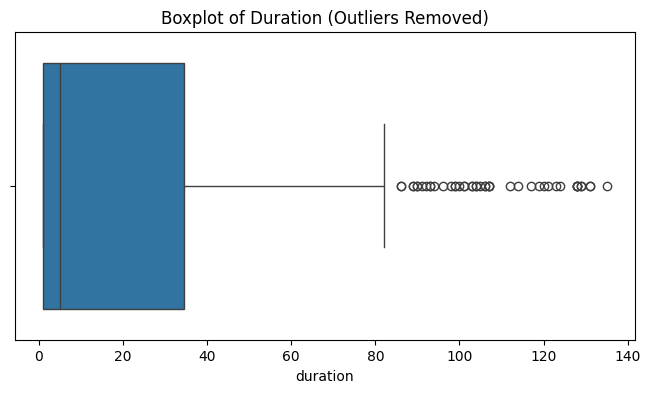

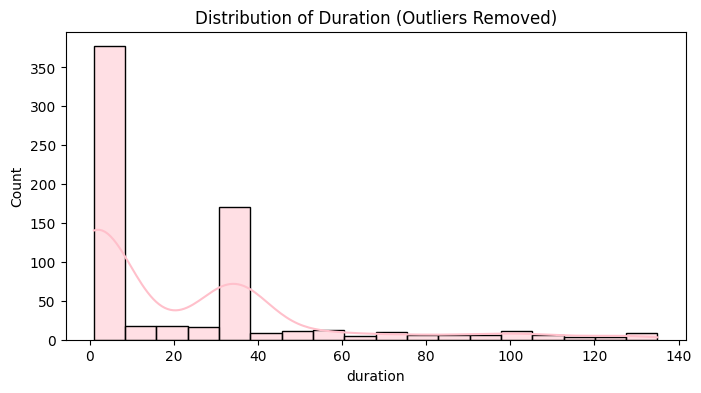

In [94]:
# Boxplot of duration after removing outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df_clean['duration'])
plt.title("Boxplot of Duration (Outliers Removed)")
plt.show()

# Distplot of duration
plt.figure(figsize=(8,4))
sns.histplot(df_clean['duration'], kde=True, color='pink')
plt.title("Distribution of Duration (Outliers Removed)")
plt.show()


 QUESTION 2 (C) Draw important inferences and conclusions from the created Plots and explain them 
as a Data Analyst.

 Inferences and conclusions from the boxplot and distribution plot of 'duration' (outliers removed):


1.The boxplot shows that after outlier removal, the majority of 'duration' values are concentrated within a much narrower range, indicating a more consistent dataset.


2.The distribution plot (histogram with KDE) reveals that most call/data durations are short, with a right-skewed distribution. This suggests that long durations are rare events.


3.The removal of outliers has reduced the spread and made the data more representative of typical usage patterns, which is important for accurate modeling and analysis.


4.As a Data Analyst, this cleaned data can now be used for further analysis (e.g., clustering, prediction) without the risk of extreme values distorting results.


5.Outlier treatment is crucial for ensuring that statistical summaries and machine learning models are not unduly influenced by rare, extreme cases.


QUESTION 2(D) Give a Five-number summary of every column on the dataset.(5 marks)

In [65]:
# Five-number summary for all numeric columns
summary_of_data = df.describe().loc[['min', '25%', '50%', '75%', 'max']]
print("Five-number summary of the data:\n", summary_of_data)


Five-number summary of the data:
       index  duration
min    0.00       1.0
25%  207.25       1.0
50%  414.50      24.5
75%  621.75      55.0
max  829.00   10528.0
